In [1]:
from mpl_toolkits import mplot3d
import torch

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from random import randint

In [3]:
from dataloader import get_dataloader
from augmentor import PointAugment_simple__

In [4]:
class C(object):
    def __init__(self):
        C.dataset = 'ModelNet10'
        C.num_points = 1024
        C.val_split = 'False'
        C.batch_size =16
        C.rotate_gaussian = 'True'
args = C()

In [5]:
device = torch.device('cpu')
train_loader, test_loader = get_dataloader(args, device)
first_batch = train_loader.__iter__().__next__()

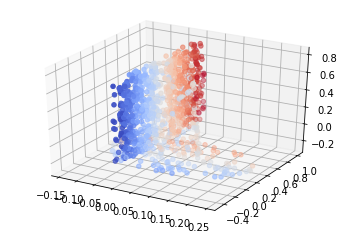

In [6]:
k=first_batch.pos
ax = plt.axes(projection='3d')
data = first_batch.pos.reshape(-1,1024,3)
idx = randint(0,15)
first_label = first_batch.y[idx]
first_data = data[idx]
# print(first_label)
xdata = first_data[:,0].numpy()
ydata = first_data[:,1].numpy()
zdata = first_data[:,2].numpy()
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap=cm.coolwarm);

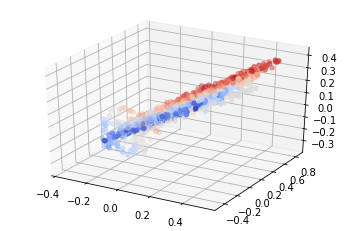

In [8]:
# used augmentor with nn.module (no weight or bias)
augmentor = PointAugment_simple__(axis='y', rotate_sigma=90)
augmented_pos = augmentor(data)

ax = plt.axes(projection='3d')
first_data = augmented_pos[idx]
xdata = first_data[:,0].numpy()
ydata = first_data[:,1].numpy()
zdata = first_data[:,2].numpy()
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap=cm.coolwarm);